# 로지스틱 회귀분석

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 평가 함수
from sklearn.metrics import accuracy_score
# confusion matrix
from sklearn.metrics import confusion_matrix

In [2]:
font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = matplotlib.font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rc('font',family= font_name)

In [15]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/HMEQ.csv', engine='python')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [16]:
# 결측치 확인
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [17]:
# fillna : 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace : fillna 함수 적용후 df_raw 데이터에 저장, False면 저장 안함
df_raw['JOB'].fillna("Other", inplace=True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력 : df_raw.mean() 각 변수별 평균치 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

In [18]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state : 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                    test_size = 0.3, # test 데이터의 비율
                                    random_state =1234) # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


In [19]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = '1'
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG +
                                DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)
# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.2257
Time:                        11:53:35   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [20]:
# test 데이터 예측
y_pred = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
dtype: int64

In [21]:
print("Accuracy : {0:.3f}\n".format(accuracy_score(df_test['BAD'], y_pred_class)))
print("Confusion Matrix : \n {}".format(confusion_matrix(df_test['BAD'], y_pred_class)))

Accuracy : 0.924

Confusion Matrix : 
 [[1017    4]
 [  81   23]]


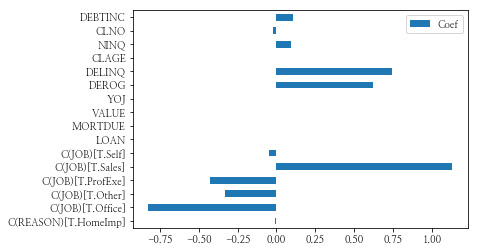

In [23]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

In [27]:
# select_dtypes : 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include='object')
df_numeric = df_raw.select_dtypes(exclude = 'object')

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [28]:
# BAD 데이터를 0과 1로 변환. np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled['BAD'] = np.where(df_scaled['BAD']>0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [29]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=1234)

In [30]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ +
                                        DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.2257
Time:                        12:10:15   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
                                        LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4815      0.205    -12.111      0.000      -2.883      -2.080

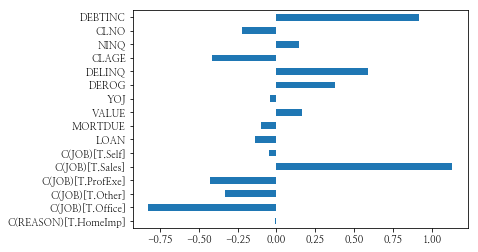

In [31]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef" : scaled_log_result.params.values[1:]},
                                 index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend=False)

## 실습

In [118]:
df_tele = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/통신고객이탈.csv', engine='python')
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [119]:
df_tele.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

## 추가내용
#### 1. 왜 범주형 데이터의 unique값을 알고자 하는가?
#### 2. for loop 을 어떻게 작성하는가?

In [120]:
# 명목형 변수들의 distinct한 값의 수
obj_cols = df_tele.select_dtypes('object').columns
for col in obj_cols:
    _n = len(df_tele[col].value_counts())
    print(col, " : ", str(_n))

CHURN  :  2
CUSTOMER_ID  :  930
GENDER  :  2
CHARGE_TYPE  :  5
HANDSET  :  11
USAGE_BAND  :  6


In [121]:
# CHURN 변수 데이터 전처리
df_tele['CHURN'] = np.where(df_tele['CHURN'] == 'Active', 0, 1)
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [122]:
# 데이터 전처리 확인
df_tele['CHURN'].value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [123]:
dft_train, dft_test = train_test_split(df_tele, test_size=0.3, random_state=1234)

print("train data size : {}".format(dft_train.shape))
print("test data size : {}".format(dft_test.shape))

train data size : (651, 15)
test data size : (279, 15)


In [124]:
log_model = Logit.from_formula("CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) +\
                                SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO +\
                                WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME", dft_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        14:17:16   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1056   2065.436     -0.012      0.991   -4072.286    4024.075
C(GENDER)[T.M]   

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [125]:
# test 데이터 예측
y_pred = log_result.predict(dft_test)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

530    0
534    0
699    0
641    0
319    0
dtype: int64

In [126]:
print("Accuracy : {0:.3f}\n".format(accuracy_score(dft_test['CHURN'], y_pred_class)))
print("Confusion Matrix : \n {}".format(confusion_matrix(dft_test['CHURN'], y_pred_class)))

Accuracy : 0.914

Confusion Matrix : 
 [[227   8]
 [ 16  28]]


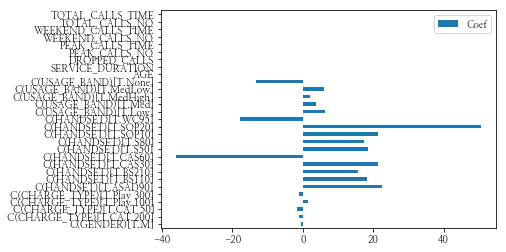

In [127]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")

In [128]:
# select_dtypes : 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_tele.select_dtypes(include='object')
df_numeric = df_tele.select_dtypes(exclude = 'object')

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,-0.489898,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,-0.489898,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,-0.489898,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,-0.489898,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,-0.489898,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [129]:
# CHURN 데이터를 0과 1로 변환. np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled['CHURN'] = np.where(df_scaled['CHURN']>0, 1, 0)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [130]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=1234)

In [136]:
log_model = Logit.from_formula("CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) +\
                                SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO +\
                                WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME", df_scaled_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 22 Jul 2019   Pseudo R-squ.:                  0.5059
Time:                        14:19:44   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
                                        LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -22.6857   2065.401     -0.011      0.991   -4070.798    4025.427
C(GENDER)[T.M]   

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


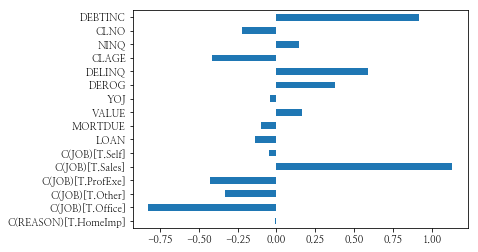

In [134]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef" : scaled_log_result.params.values[1:]},
                                 index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend=False)